# CNN implementation with Resnet 50

In [1]:
##Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Loading the Data

In [2]:
##Loading and checking the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Visualizing the Samples

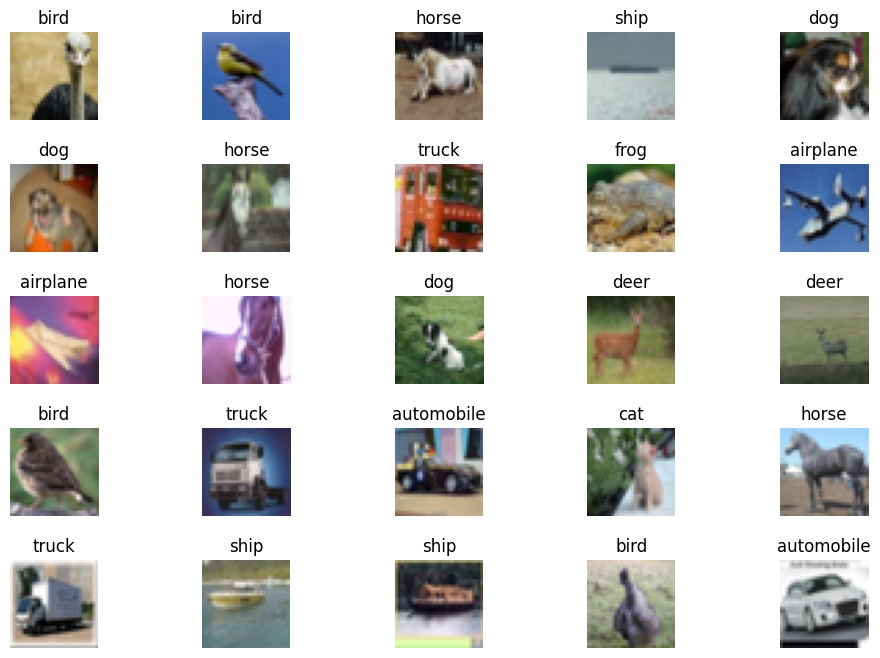

In [3]:
##Visualizing Samples

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5,5, figsize = (12,8))
axes = axes.ravel()

for i in range(25):
  index = np.random.randint(0,len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(class_names[y_train[index][0]])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

# Class Distribution

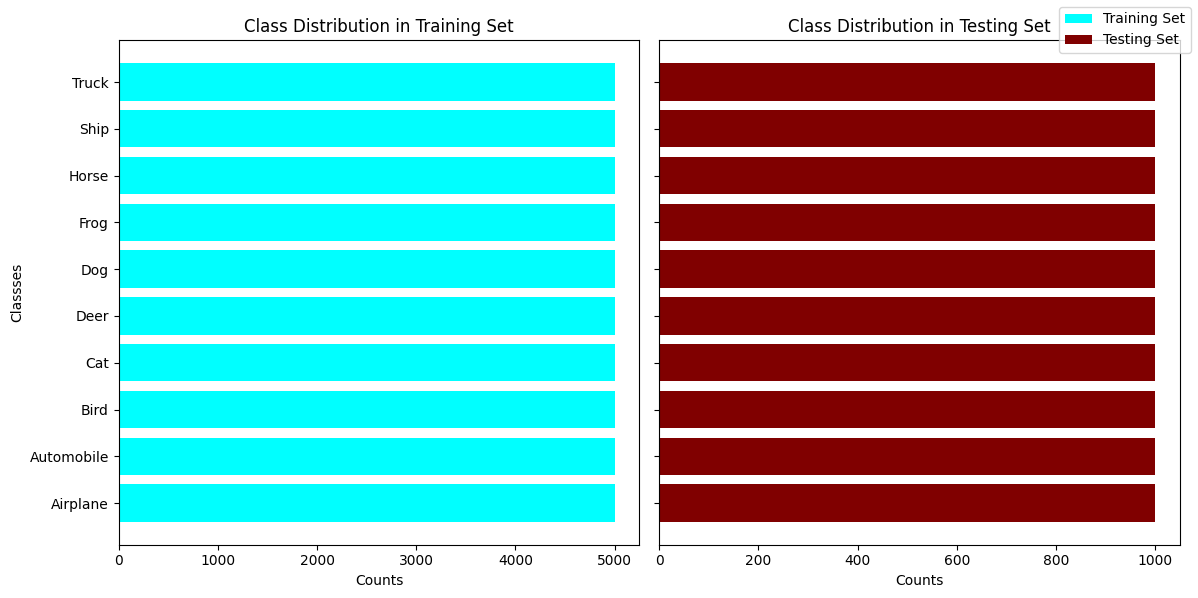

In [4]:
## Checking the class distribution

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classses, test_counts = np.unique(y_test, return_counts=True)

fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=True)

axs[0].barh(classes_name, train_counts, color = 'cyan')
axs[0].set_title('Class Distribution in Training Set')
axs[0].set_xlabel('Counts')
axs[0].set_ylabel('Classses')

axs[1].barh(classes_name, test_counts, color = 'maroon')
axs[1].set_title('Class Distribution in Testing Set')
axs[1].set_xlabel('Counts')

fig.legend(['Training Set' , 'Testing Set'], loc='upper right')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [5]:
##Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
##One-Hot Encoding

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [7]:
##Data Augmentaion

train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True, zoom_range=0.1)
train_datagen.fit(X_train)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_cat_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_cat_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


# Model Building

In [8]:
##First creating a basic network
num_of_classes = 10

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_cat_train, validation_split=0.2, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 3ms/step - loss: 1.9514 - accuracy: 0.2848 - val_loss: 1.8516 - val_accuracy: 0.3376
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8354 - accuracy: 0.3374 - val_loss: 1.8933 - val_accuracy: 0.3134
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8026 - accuracy: 0.3455 - val_loss: 1.8125 - val_accuracy: 0.3526
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7851 - accuracy: 0.3533 - val_loss: 1.7975 - val_accuracy: 0.3507
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7679 - accuracy: 0.3607 - val_loss: 1.7778 - val_accuracy: 0.3665
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7635 - accuracy: 0.3648 - val_loss: 1.8057 - val_accuracy: 0.3420
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7509 - accuracy: 0.3655 - val_loss: 1.7858 - val_accuracy:

In [10]:
#Defining utility functions for printing the accuracies and losses over the epochs
def smooth_curve(points,factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

def plot_convergence():
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.plot(smooth_curve(history.history['accuracy']), marker= 'o', label = 'Train Accuracy')
  plt.plot(smooth_curve(history.history['val_accuracy']), marker= 'o', label = 'Validation Accuracy')
  plt.title('Training and Validation Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(smooth_curve(history.history['loss']),marker = 'o', label = 'Train Loss')
  plt.plot(smooth_curve(history.history['val_loss']),marker = 'o', label = 'Validation Loss')
  plt.title('Training and Validation Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

def test_model_accuracy(model):
  test_loss,test_accuracy = model.evaluate(X_test, y_cat_test)
  print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
  plot_convergence()

313/313 [==============================] - 1s 3ms/step - loss: 1.7631 - accuracy: 0.3661
Test Accuracy: 36.61%


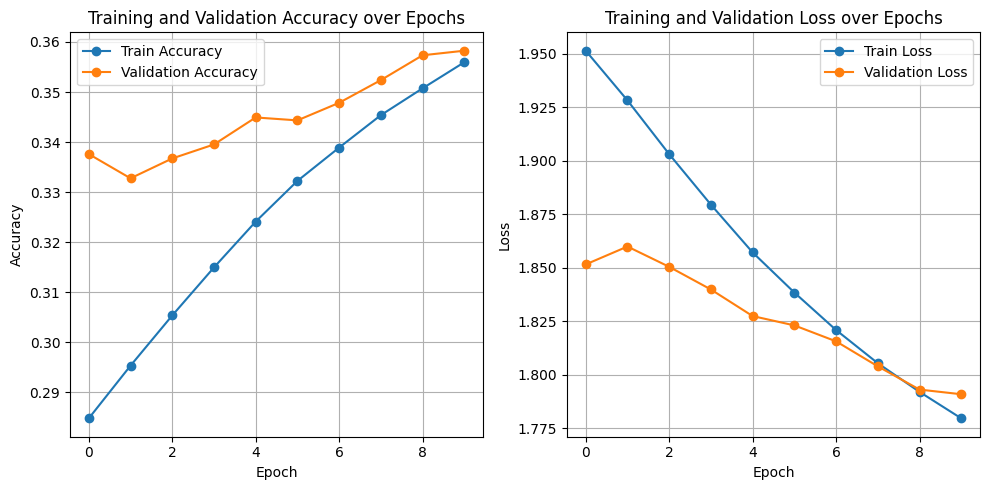

In [11]:
#Testing the basic model
test_model_accuracy(model)

# Implementing Resnet50

In [12]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [13]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [14]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [15]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,     #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=50,            #Seting a high number of epochs
    validation_split=0.2,
    callbacks=[early_stopping]  #Including the early stopping callback
)


Epoch 1/50
1250/1250 [==============================] - 558s 420ms/step - loss: 1.5929 - accuracy: 0.4689 - val_loss: 0.7686 - val_accuracy: 0.7890
Epoch 2/50
1250/1250 [==============================] - 523s 418ms/step - loss: 0.9332 - accuracy: 0.7289 - val_loss: 0.4385 - val_accuracy: 0.8924
Epoch 3/50
1250/1250 [==============================] - 517s 414ms/step - loss: 0.6773 - accuracy: 0.8268 - val_loss: 0.3236 - val_accuracy: 0.9183
Epoch 4/50
1250/1250 [==============================] - 517s 414ms/step - loss: 0.5173 - accuracy: 0.8842 - val_loss: 0.2858 - val_accuracy: 0.9281
Epoch 5/50
1250/1250 [==============================] - 523s 418ms/step - loss: 0.4067 - accuracy: 0.9150 - val_loss: 0.2984 - val_accuracy: 0.9181
Epoch 6/50
1250/1250 [==============================] - 517s 414ms/step - loss: 0.3234 - accuracy: 0.9385 - val_loss: 0.2243 - val_accuracy: 0.9384
Epoch 7/50
1250/1250 [==============================] - 522s 418ms/step - loss: 0.2603 - accuracy: 0.9551 - val_

313/313 [==============================] - 36s 116ms/step - loss: 0.2232 - accuracy: 0.9410
Test Accuracy: 94.10%


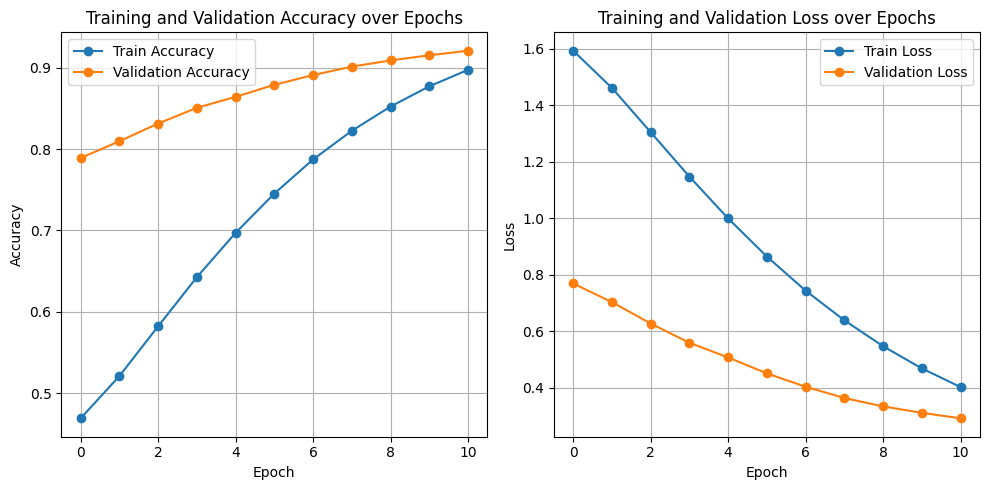

In [17]:
test_model_accuracy(model)

# Saving the Model

In [18]:
from tensorflow.keras.models import load_model

model.save('cnn_with_resnet50_epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model2 = load_model('cnn_with_resnet50_epochs.h5')

In [20]:
model2.predict(X_test)

313/313 [==============================] - 37s 115ms/step


array([[1.91855174e-03, 1.39099825e-03, 4.16258303e-03, ...,
        1.38860650e-03, 1.35427830e-03, 1.23398262e-03],
       [1.03440318e-04, 2.07696969e-04, 3.12483084e-04, ...,
        1.88726306e-04, 9.98099029e-01, 1.78596281e-04],
       [4.25881520e-03, 9.23952878e-01, 2.77335104e-03, ...,
        3.93001735e-03, 4.90221828e-02, 3.82909039e-03],
       ...,
       [3.03591922e-04, 9.15239099e-04, 6.99738332e-04, ...,
        9.62368213e-04, 6.37442339e-04, 1.46717735e-04],
       [1.70402753e-03, 9.90311503e-01, 5.74443548e-04, ...,
        7.16824608e-04, 1.54326332e-03, 1.43773691e-03],
       [1.79588751e-04, 1.18804535e-04, 8.66254850e-05, ...,
        9.98621583e-01, 1.05819418e-04, 2.68351840e-04]], dtype=float32)

# Evaluation of the Model

313/313 [==============================] - 36s 115ms/step - loss: 0.2232 - accuracy: 0.9410
Test Accuracy : 94.10%
313/313 [==============================] - 37s 114ms/step


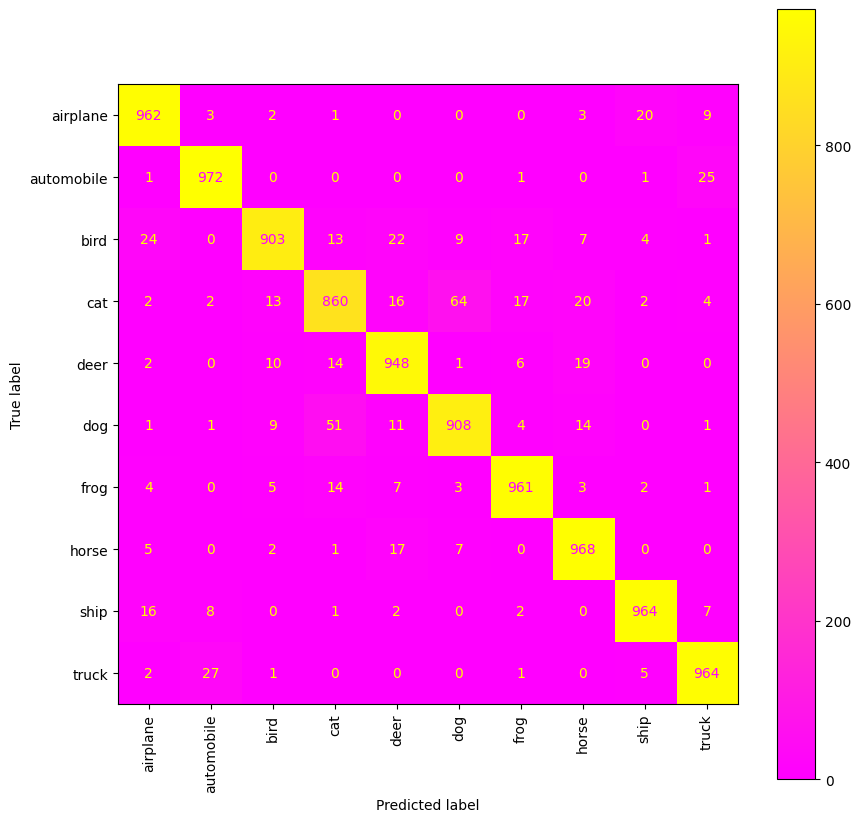

In [21]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='spring')

plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.97      0.97      1000
           2       0.96      0.90      0.93      1000
           3       0.90      0.86      0.88      1000
           4       0.93      0.95      0.94      1000
           5       0.92      0.91      0.91      1000
           6       0.95      0.96      0.96      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Testing against the Images

 Image 69 is [7]
1/1 [==============================] - 1s 867ms/step
The model predict that image 69 is horse


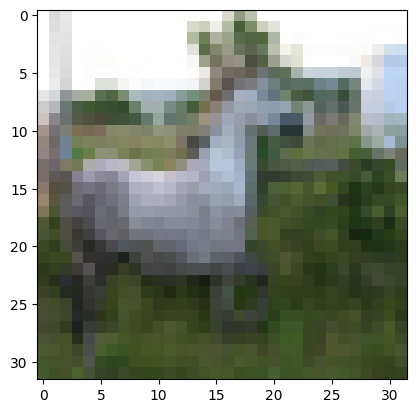

In [23]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

my_image = X_test[69]
plt.imshow(my_image)

print(f" Image 69 is {y_test[69]}")

pred_69 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 69 is {labels[pred_69]}")

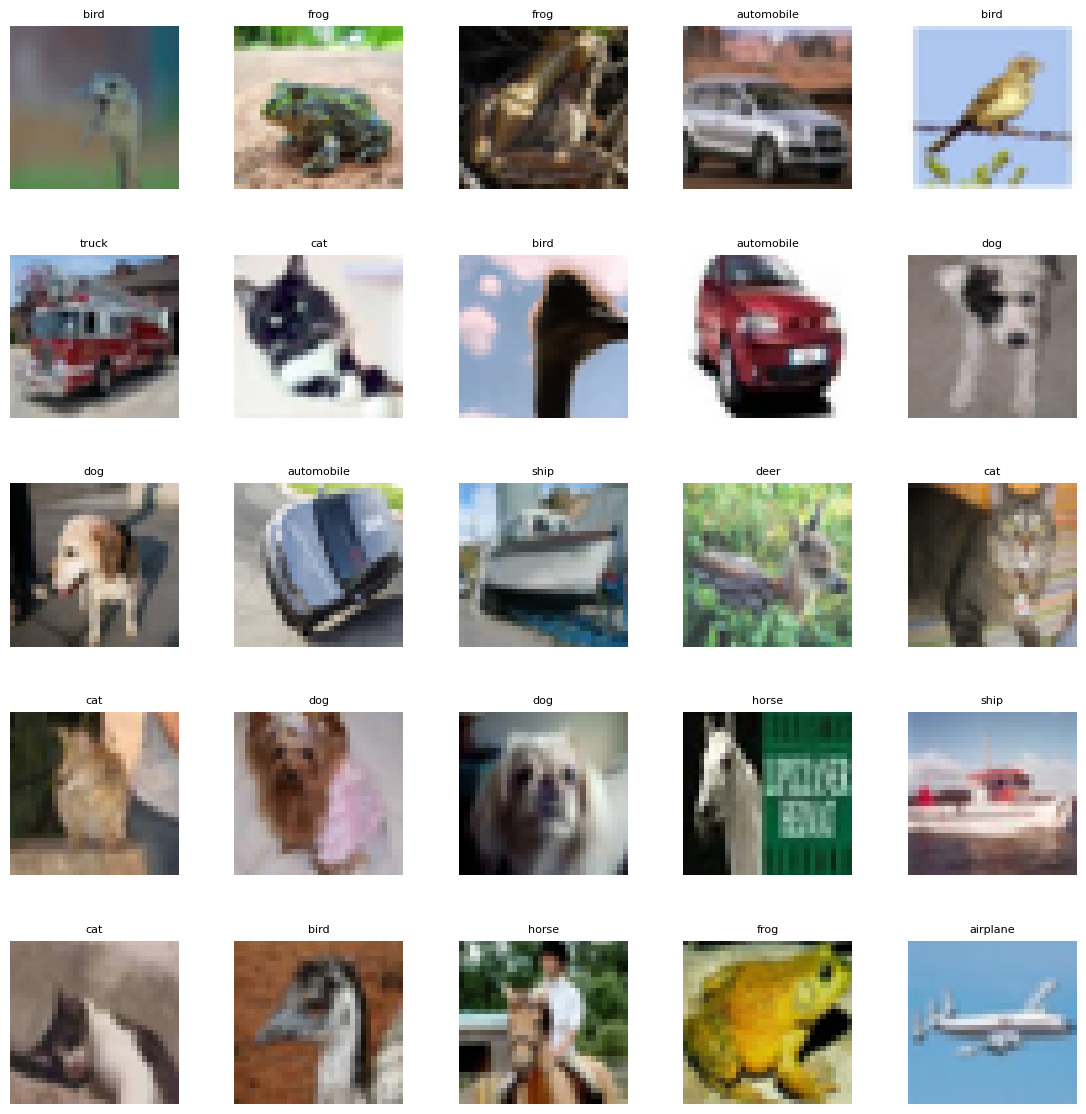

In [24]:

W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (14,14))

axes = axes.ravel()

n_test = len(X_test)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [25]:
predictions = model.predict(X_test)

313/313 [==============================] - 36s 115ms/step


<ipython-input-26-6f32f7930c16>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-26-6f32f7930c16>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


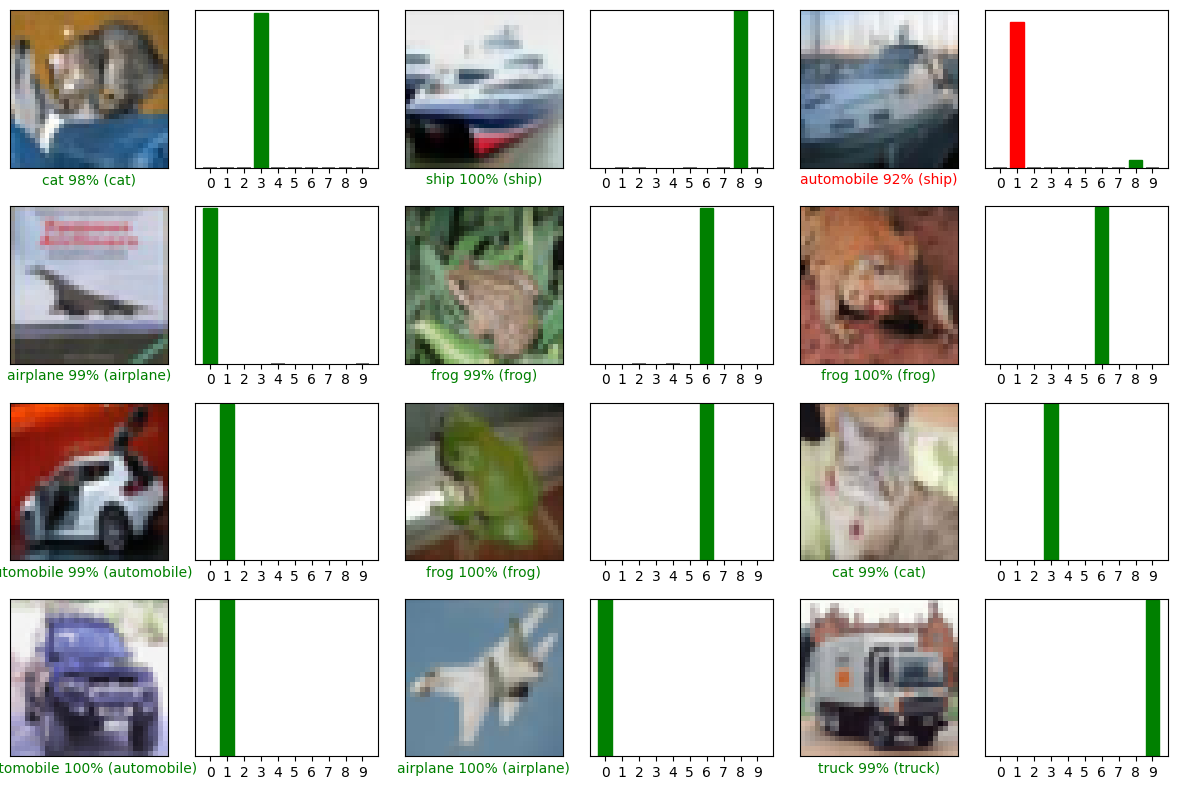

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()